# Breast Cancer Data

In [196]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Breast Cancer Data 정규화

In [197]:
from sklearn.datasets import load_breast_cancer
breast = load_breast_cancer()
df = pd.DataFrame(breast.data, columns=breast.feature_names)
df['target'] = breast.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [198]:
from sklearn.preprocessing import StandardScaler
breast_std = StandardScaler().fit_transform(breast.data)

- PCA로 차원축소(2, 5, 10) - 설명력

In [199]:
# 2차원으로 축소
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
breast_pca = pca.fit_transform(breast_std)
pca.explained_variance_ratio_, sum(pca.explained_variance_ratio_)

(array([0.44272026, 0.18971182]), 0.6324320765155936)

In [200]:
# 5차원으로 축소
pca2 = PCA(n_components=5)
breast_pca2 = pca2.fit_transform(breast_std)
pca2.explained_variance_ratio_, sum(pca2.explained_variance_ratio_)

(array([0.44272026, 0.18971182, 0.09393163, 0.06602135, 0.05495768]),
 0.8473427431680536)

In [201]:
# 10차원으로 축소
pca3 = PCA(n_components=10)
breast_pca3 = pca3.fit_transform(breast_std)
pca3.explained_variance_ratio_, sum(pca3.explained_variance_ratio_)

(array([0.44272026, 0.18971182, 0.09393163, 0.06602135, 0.05495768,
        0.04024522, 0.02250734, 0.01588724, 0.01389649, 0.01168978]),
 0.951568814335557)

- PCA 전후 비교

In [202]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [203]:
# 정규화 데이터로 분류
X_train, X_test, y_train, y_test = train_test_split(
    breast_std, breast.target, stratify=breast.target, random_state=2021
)
lrc = LogisticRegression(random_state=2021)
lrc.fit(X_train, y_train)
lrc.score(X_test, y_test)

0.993006993006993

In [204]:
def pca_accuracy(X, y):
    X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, random_state=2021
)
    lrc = LogisticRegression(random_state=2021)
    lrc.fit(X_train, y_train)
    score = lrc.score(X_test, y_test)
    return score

In [205]:
for n in[2, 5, 10]:
    pca = PCA(n_components=n)
    breast_pca = pca.fit_transform(breast_std)
    explained = sum(pca.explained_variance_ratio_)
    acc = pca_accuracy(breast_pca, breast.target)
    print(f'PCA {n} 설명력 : {explained:.4f} 정확도 : {acc:.4f}')
print(f'정규화 데이터 설명력 : 1.0 정확도 : {pca_accuracy(breast_std, breast.target):.4f}')

PCA 2 설명력 : 0.6324 정확도 : 0.9441
PCA 5 설명력 : 0.8473 정확도 : 0.9930
PCA 10 설명력 : 0.9516 정확도 : 0.9860
정규화 데이터 설명력 : 1.0 정확도 : 0.9930


- 2차원 시각화

In [206]:
df['PC1'] = breast_pca[:, 0]
df['PC2'] = breast_pca[:, 1]

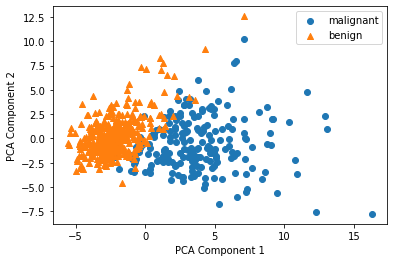

In [207]:
markers = ['o', '^']
for i, marker in enumerate(markers):
    x_data = df[df.target == i]['PC1']
    y_data = df[df.target == i]['PC2']
    plt.scatter(x_data, y_data, marker=marker, label=breast.target_names[i])
plt.legend()
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


- (재미로 보는) 3차원 시각화

In [208]:
pca = PCA(n_components=3)
breast_pca = pca.fit_transform(breast_std)
pca.explained_variance_ratio_, sum(pca.explained_variance_ratio_)

(array([0.44272026, 0.18971182, 0.09393163]), 0.7263637090864715)

In [209]:
df['PC1'] = breast_pca[:, 0]
df['PC2'] = breast_pca[:, 1]
df['PC3'] = breast_pca[:, 2]

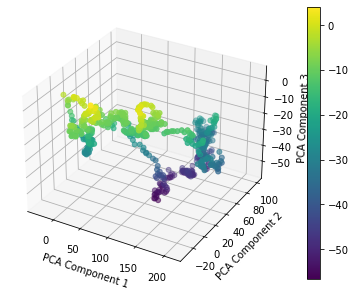

In [210]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(projection='3d')


x = np.cumsum(df['PC1'])
y = np.cumsum(df['PC2'])
z = np.cumsum(df['PC3'])

p = ax.scatter(x,y,z,c=z,s=25,marker='o')
fig.colorbar(p)


ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
plt.show()